

# **Introduction:**

The project serves as the capstone of Google Analytics Certificate. And an illustration of my dedication in data analysis.
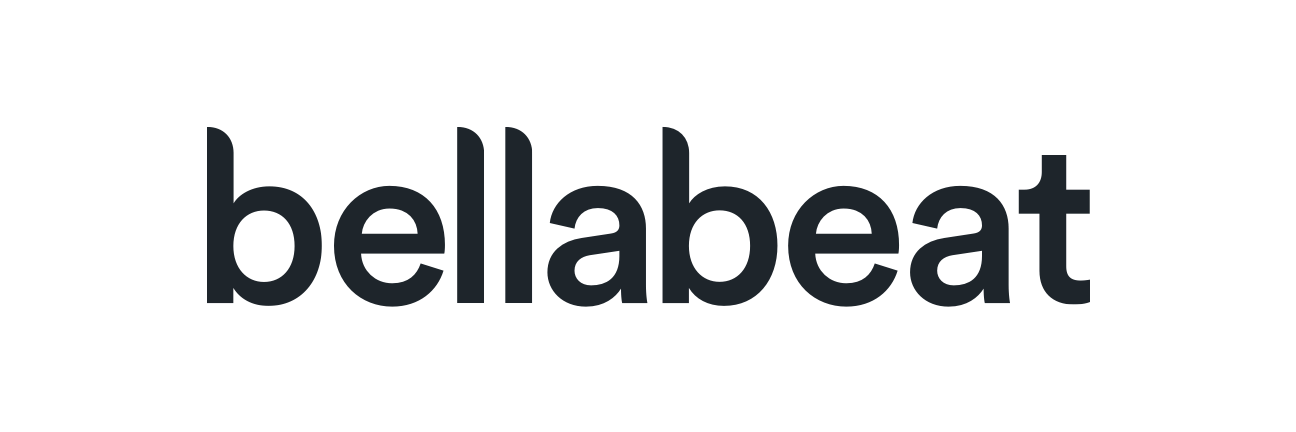
As a a junior data analyst working on the marketing analyst team at Bellabeat. I need to answer the following questions by different approaches.

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

With the questions in mind, the follwing deliverables are finally what I need to present.

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of my analysis
5. Supporting visualizations and key findings
6. My top high-level content recommendations based on your analysis

To complete the analysis, I will use the 6 stages of analysis process as a guide.
* Ask
* Prepare
* Process
* Analyze
* Share
* Act

# **Ask**

Problem list that I need to solve:
1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy?

The insights that I generated from this data analysis can serve as a way to increase our market sales. 

Statement of business task:
By utilizing specific data sets, analyze the trends in overall smart device market. The apply the trend on the specific product that we have. Finally create a successful marketing strategy to increase sales.


# **Prepare**

In public data set FitBit Fitness Tracker Data, I can download them and use it for more investigations. As the data set is stored on Kaggle, I can use a notebook and coding for a closer view in R enviroment here.


In [1]:
# load some packages first
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(dplyr)
library(plyr)
library(ggplot2)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:here’:

    here


The following objects are

In [2]:
# Input all the .csv into data frames 
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate_sec <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minute_calories_narrow <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minute_calories_wide <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minute_intensities_narrow <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minute_mets <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minute_sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minute_steps_narrow <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minute_steps_wide <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleepday <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

For the further preparation of the data, I want to know how are they organized and in what format they are stored. Knowing this, I can understand what is the significance level of the data sets. i.e. which of them will be used in future analysis.

In [3]:
glimpse(daily_activity)
n_distinct(daily_activity$Id)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

[1] 33

33 participants has been detected, sufficient data could be used.

This data frame allocates 33 participants’ daily calories, intensities (Activity minutes and distances), and steps. Allocating the 3 data frames below

In [4]:
glimpse(daily_calories)
n_distinct(daily_activity$Id)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


[1] 33

In [5]:
glimpse(daily_intensities)
n_distinct(daily_activity$Id)

Rows: 940
Columns: 10
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDay              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ SedentaryMinutes         <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818…
$ LightlyActiveMinutes     <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…


[1] 33

In [6]:
glimpse(daily_steps)
n_distinct(daily_steps$Id)

Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ StepTotal   <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1054…


[1] 33

In [7]:
glimpse(heartrate_sec)
n_distinct(heartrate_sec$Id)

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


[1] 14

14 participants have been seen in the dataset, although we can utilize the data to analyze the relationship between the users' average heart rate and calories, the number of data is still insufficient to drive a conclusion.

In [8]:
glimpse(hourly_calories)
n_distinct(hourly_calories$Id)

Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


[1] 33

In [9]:
glimpse(hourly_intensities)
n_distinct(daily_intensities$Id)

Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


[1] 33

In [10]:

glimpse(hourly_steps)
n_distinct(hourly_steps$Id)

Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


[1] 33

In [11]:
## wide files and narrow files are same with different display formats, long or wide.
glimpse(minute_calories_narrow)
n_distinct(minute_calories_narrow$Id)

Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ Calories       <dbl> 0.7865, 0.7865, 0.7865, 0.7865, 0.7865, 0.9438, 0.9438,…


[1] 33

In [12]:
glimpse(minute_intensities_narrow)
n_distinct(minute_intensities_narrow$Id)

Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ Intensity      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


[1] 33

In [13]:
glimpse(minute_mets)
n_distinct(minute_mets$Id)

Rows: 1,325,580
Columns: 3
$ Id             <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960…
$ ActivityMinute <chr> "4/12/2016 12:00:00 AM", "4/12/2016 12:01:00 AM", "4/12…
$ METs           <int> 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 10, 10,…


[1] 33

In [14]:
glimpse(minute_sleep)
n_distinct(minute_sleep$Id)

Rows: 188,521
Columns: 4
$ Id    <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366, 1503…
$ date  <chr> "4/12/2016 2:47:30 AM", "4/12/2016 2:48:30 AM", "4/12/2016 2:49:…
$ value <int> 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1…
$ logId <dbl> 11380564589, 11380564589, 11380564589, 11380564589, 11380564589,…


[1] 24

In [15]:
glimpse(sleepday)
n_distinct(sleepday$Id)

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


[1] 24

In [16]:
glimpse(weight)
n_distinct(weight$Id)

Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


[1] 8

8 distinct participants has been observed, the data is not statistical significant to be analyzed. 

**Conclution of the preparation**

After reviewing all the files in FitBit data, I found some of them might be useful.
Description of data sources used:
1.	dailyActivity_merged.csv AS daily_activity: an allocated file of the 33 participants’ daily calories, intensities (Activity minutes and distances), and steps.
2.	SleepDay_merged.csv AS sleepday: a file tracking the participant’s total sleeping times per day, sleep times in minutes, and total time in bed.
3.	hourly_calories.csv AS hourly_calories: a file cosisting 33 participants' calories spend by hours.


# **Process**

After decided the data frames to use, I need to clean them, especially for the Date&Time columns.

In [17]:
#Check the data types of the 3 data frames
str(daily_activity)
str(sleepday)
str(hourly_calories)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [18]:
#See if there is any NA occurs
count(is.na(daily_activity)== TRUE)
count(is.na(sleepday)== TRUE)
count(is.na(hourly_calories)== TRUE)

x.Id  x.ActivityDate x.TotalSteps x.TotalDistance x.TrackerDistance
1 FALSE FALSE          FALSE        FALSE           FALSE            
  x.LoggedActivitiesDistance x.VeryActiveDistance x.ModeratelyActiveDistance
1 FALSE                      FALSE                FALSE                     
  x.LightActiveDistance x.SedentaryActiveDistance x.VeryActiveMinutes
1 FALSE                 FALSE                     FALSE              
  x.FairlyActiveMinutes x.LightlyActiveMinutes x.SedentaryMinutes x.Calories
1 FALSE                 FALSE                  FALSE              FALSE     
  freq
1 940

x.Id  x.SleepDay x.TotalSleepRecords x.TotalMinutesAsleep x.TotalTimeInBed
1 FALSE FALSE      FALSE               FALSE                FALSE           
  freq
1 413

x.Id  x.ActivityHour x.Calories freq 
1 FALSE FALSE          FALSE      22099

It's great to see that there is no NA value in the data frames, but there do have several rows that consist of 0 in daily_activity's total steps, which need to be removed. 

Not only for 0 values in the total steps, but l will also remove all the values that are lower than 100 steps per day for better accuracy. Because, if the daily step is below 100, it is very likely to be an error.

In [19]:
#remove rows that have daily steps < 100 rows in daily_activity or calories < 500, and call it clean_activity
clean_activity <- filter(daily_activity, TotalSteps >= 100 & Calories >= 500)

In [20]:
#Fix the format of Date&Time
clean_activity$ActivityDate = mdy(clean_activity$ActivityDate)


In [21]:
sleepday$ActivityDate=mdy_hms(sleepday$SleepDay)
#Rename the date for further merging need

In [22]:
hourly_calories$ActivityHour=mdy_hms(hourly_calories$ActivityHour)

# **Analyze**

Now, I would like to dive into the 3 data sets and summarize the improtant data.

In [23]:
#Summary of daily steps, distance, and calories
clean_activity %>%
    select(TotalSteps,
           TotalDistance,
           SedentaryMinutes,
           Calories) %>%
summary()
#Summary of daily sleep time and time in bed
#Create a new column called insomniatime, by using time in bed minus minutes asleep.
#Indicating the time between get on bed and fall asleep
sleepday <- mutate(sleepday, insomniatime = TotalTimeInBed - TotalMinutesAsleep)
sleepday %>%
    select(TotalMinutesAsleep,
           TotalTimeInBed,
           insomniatime) %>%
summary()
#Summary of hourly calories
summary(select(hourly_calories, Calories))

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :  108   Min.   : 0.080   Min.   : 125.0   Min.   : 741  
 1st Qu.: 4989   1st Qu.: 3.450   1st Qu.: 721.8   1st Qu.:1868  
 Median : 8115   Median : 5.650   Median :1020.0   Median :2225  
 Mean   : 8426   Mean   : 6.056   Mean   : 954.7   Mean   :2376  
 3rd Qu.:11114   3rd Qu.: 7.973   3rd Qu.:1187.2   3rd Qu.:2840  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 TotalMinutesAsleep TotalTimeInBed   insomniatime   
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.00  
 1st Qu.:361.0      1st Qu.:403.0   1st Qu.: 17.00  
 Median :433.0      Median :463.0   Median : 25.00  
 Mean   :419.5      Mean   :458.6   Mean   : 39.17  
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 40.00  
 Max.   :796.0      Max.   :961.0   Max.   :371.00  

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

From the summaries above, I observed the following:

1. The average of the daily calories burned is about 2376.
2. The average sedentary time is about 954.7 minutes.
3. The average time falls asleep is about 419.5 minutes, whereas the time in bed is 458.6 minutes i.e. An average sleeping time is 7 hours/day.
4. More interestingly, the average time spend in bed to fall asleep is 39.17 minutes. the maximum of this time even rises to 371 minutes or more than 6 hours.

About the fourth observation, I have a personal opinion, as a person who always suffering from insomnia, I am really hard to fall asleep, and could not feel energetic in the next moring because of the difficulty of sleeping well. It is really bad for a person's productivity, and will even affects the next day's sleeping quality.


# Share

First, I want to find out if there is any relationship between different parameters and this "insomnia time" by using data visualizations.

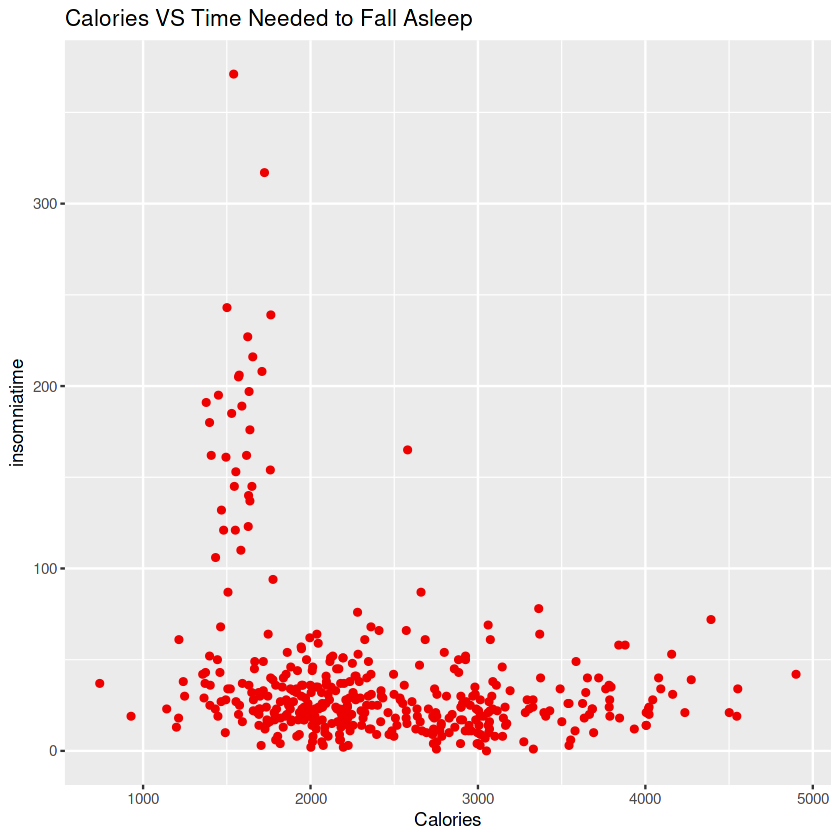

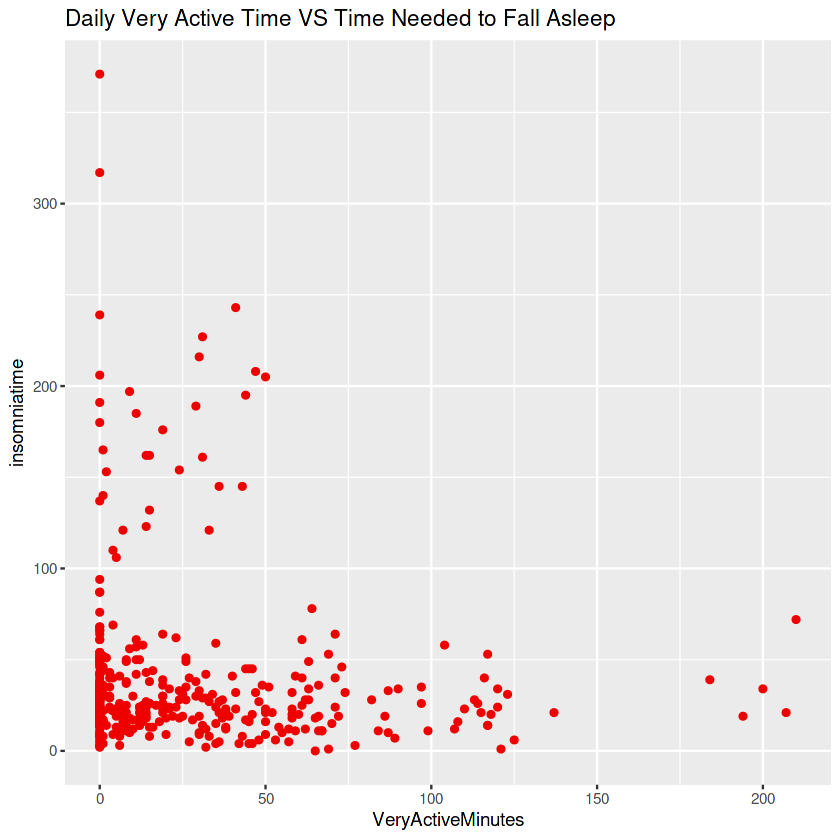

In [24]:
#Before analyze the relationships, we need to merge the data frames, sleepday and clean_activity
merged_activity <- merge(sleepday, clean_activity, by=c('Id', 'ActivityDate'))

#Make a graph of the relationship between calories and insomnia time
ggplot(data = merged_activity, aes(x = Calories, y = insomniatime)) +
    geom_point(color= ('red2'))+
    labs(title="Calories VS Time Needed to Fall Asleep")
    

#See if active minutes have relationship with insomnia time
ggplot(data = merged_activity, aes(x = VeryActiveMinutes, y = insomniatime)) +
    geom_point(color= ('red2'))+
    labs(title="Daily Very Active Time VS Time Needed to Fall Asleep")

Among the two graphs above, we can see there are clear outliers of insomniatime that is greater than 100. 

****For all the insomniatime > 100, there is an observation that daily calories burnt < 2000, or a very active minutes < 50 ****

Second, I want to know what time our participants usually spend more calories. Knowing the trend, I can have a better insight into when should suggest our customers to workout.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


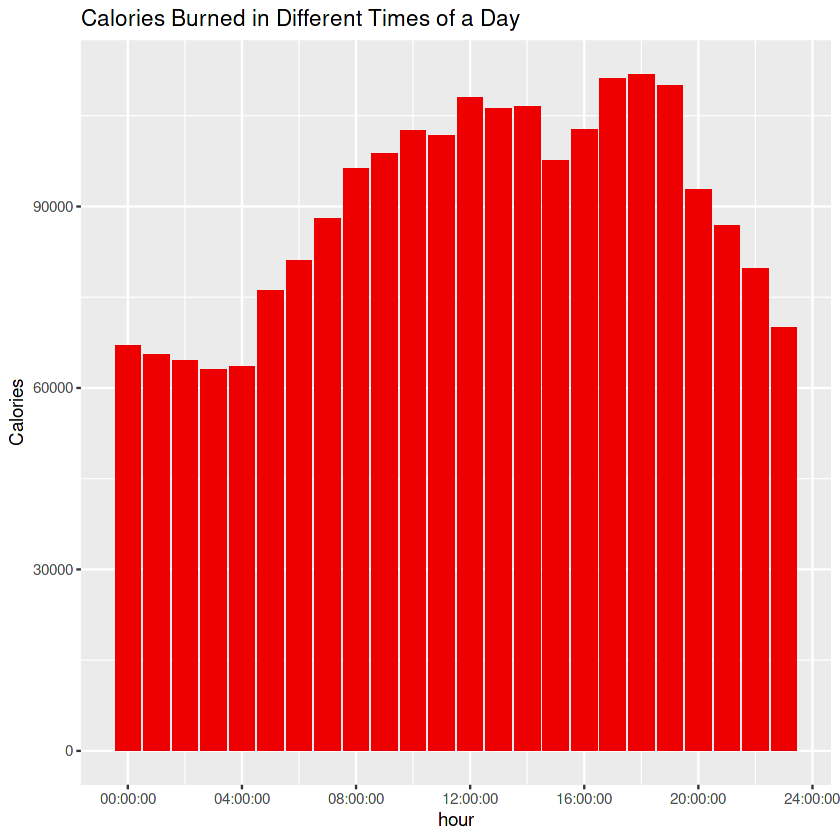

In [25]:
#First, I need to transfer the calories to hours, instead of Date and hour.
hourly_calories <- mutate(hourly_calories, hour = hms::as_hms(ActivityHour))


#Look at the trend of calories burnt and time of a day.
ggplot(data = hourly_calories, aes(x = hour, y = Calories)) +
    geom_histogram(stat = "identity", fill='red2')+
    labs(title="Calories Burned in Different Times of a Day")


We can see a clear curve, showing that the most active period within a day that consume the most calories, are from 12:00 to 14:00, and 16:00 to 19:00.






# Act

From the diagrams I made, we can donclude the following trends:

**1. insomnia usually happens when daily calories burnt are less than 2000, and vary active workout time is less than 50 minutes per day.**
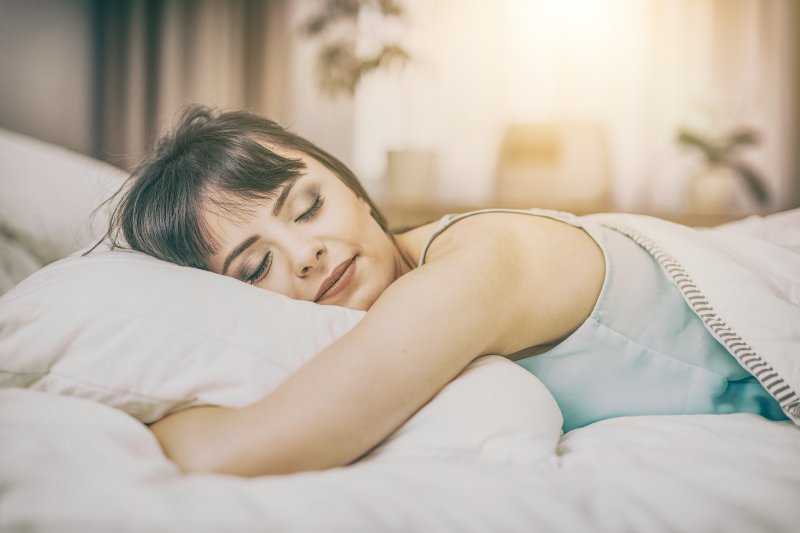
**2. The most calories spent time is between everyday's 12:00 to 14:00, and 16:00 to 19:00**
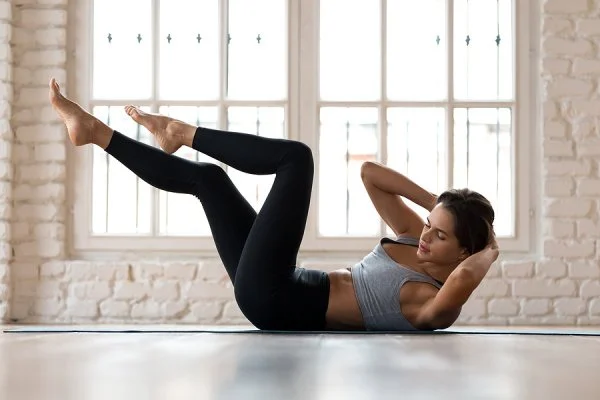

With the trends that we observed from FitBit data set, we can create more functions to our Bellabeat App.
* For our customers' sufficient rest and health. Sending persuasive notifications when the user is lying on the bed for over 50 minutes but has not fallen asleep.
* Calculate the daily calories spend for suggestions of spending over 2200 calories per day. 
* Monitoring the active time for customers, and suggesting the most recommended workout times from 12:00 to 14:00 and 16:00 to 19:00.
* Promoting the idea of not sitting too long for the sake of health concerns.
* Emphasis the importance relationship between insomnia and excercies, and release new wareable products to monitor the sleeping quality. Adding new features to it would be great approches. For example, recommending the users go to bed 30 minutes before the personal average sleep time. Or play some soft and relaxing music when the customer is lying on bed, and could turn off automaticly.  

# In The End

Thank you very much for reading through the project. I hope you can have some insight from the case, and bring it to your daily life!